In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB7
from skimage.transform import resize
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
image_size = (224, 224)
batch_size = 32

train = tf.keras.preprocessing.image_dataset_from_directory(
    "./Data/data_location_damage/training/",
    image_size = image_size,
    batch_size = batch_size,
    label_mode = 'categorical'
)
val = tf.keras.preprocessing.image_dataset_from_directory(
    "./Data/data_location_damage/validation/",
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)


Found 979 files belonging to 3 classes.
Found 171 files belonging to 3 classes.


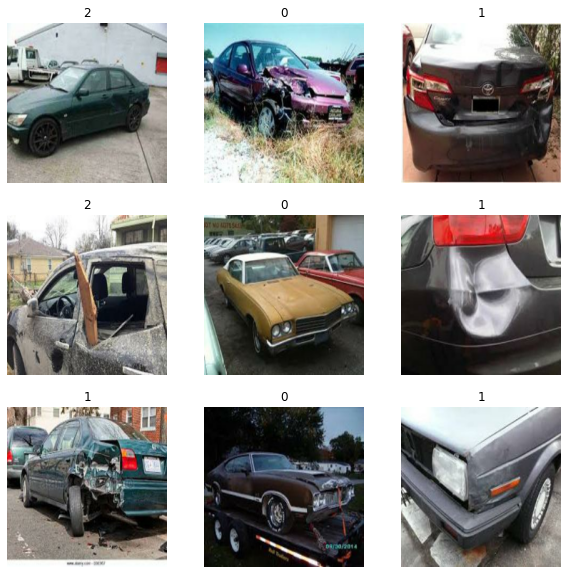

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    labels=np.argmax(labels, axis=1)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [5]:
new_input = keras.Input(shape=(224, 224, 3))
base_model = EfficientNetB7(include_top=False, 
                            input_tensor=new_input, 
                            pooling='max', 
                            weights='imagenet')

In [6]:
# freeze base model to use the pre-trained imagenet weights!
base_model.trainable=False

In [7]:
model=keras.Sequential()
model.add(base_model)
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb7 (Functional)  (None, 2560)              64097687  
_________________________________________________________________
dense (Dense)                (None, 3)                 7683      
Total params: 64,105,370
Trainable params: 7,683
Non-trainable params: 64,097,687
_________________________________________________________________


In [8]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.categorical_crossentropy,
             metrics=[keras.metrics.categorical_accuracy]
             )

In [9]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

In [11]:
results = model.fit(train, 
                    epochs=15, 
                    validation_data=val,
                    verbose=1,
                    callbacks=[callback],
                    
                   )

Epoch 1/15
 8/31 [======>.......................] - ETA: 1:47 - loss: 2.6621 - categorical_accuracy: 0.3242

KeyboardInterrupt: 

In [19]:
# unfreeze base model!
base_model.trainable=True

In [20]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
             loss=keras.losses.categorical_crossentropy,
             metrics=[keras.metrics.categorical_accuracy]
             )

In [23]:
checkpoint_filepath = './Saved_Models/Model_location/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)

In [24]:
results_unfreeze = model.fit(augmented_train, 
                    epochs=10, 
                    validation_data=augmented_val,
                    verbose=1,
                    callbacks=[callback,model_checkpoint_callback],
                    
                   )

Epoch 1/10
31/31 [==============================] - 69s 2s/step - loss: 0.0334 - categorical_accuracy: 0.9908 - val_loss: 1.9079 - val_categorical_accuracy: 0.7544


INFO:tensorflow:Assets written to: ./Saved_Models/Model_location/assets


INFO:tensorflow:Assets written to: ./Saved_Models/Model_location/assets


Epoch 2/10
31/31 [==============================] - 74s 2s/step - loss: 0.0214 - categorical_accuracy: 0.9939 - val_loss: 1.8924 - val_categorical_accuracy: 0.7544
Epoch 3/10
31/31 [==============================] - 76s 2s/step - loss: 0.0185 - categorical_accuracy: 0.9928 - val_loss: 1.8734 - val_categorical_accuracy: 0.7485
Epoch 4/10
31/31 [==============================] - 65s 2s/step - loss: 0.0105 - categorical_accuracy: 0.9980 - val_loss: 1.8632 - val_categorical_accuracy: 0.7485
Epoch 5/10
31/31 [==============================] - 65s 2s/step - loss: 0.0168 - categorical_accuracy: 0.9928 - val_loss: 1.8502 - val_categorical_accuracy: 0.7544
Epoch 6/10
31/31 [==============================] - 65s 2s/step - loss: 0.0178 - categorical_accuracy: 0.9918 - val_loss: 1.8212 - val_categorical_accuracy: 0.7544
Epoch 7/10
31/31 [==============================] - 65s 2s/step - loss: 0.0121 - categorical_accuracy: 0.9939 - val_loss: 1.8143 - val_categorical_accuracy: 0.7544
Epoch 8/10
31/31